In [23]:
x=True

In [24]:
import numpy as np
np.random.seed(0)

In [25]:
not x

False

In [26]:
X = np.random.randn(300, 2)
y = np.logical_or(X[:, 0] > 0, X[:, 1] > 0)
y_T = np.where(y)
y_F = np.shape(y is True)

In [27]:
y_T

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  17,  18,  21,  23,  25,  27,  28,  32,  33,  34,
         35,  36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  78,  80,
         81,  82,  84,  85,  86,  87,  89,  92,  93,  94,  95,  97,  98,
         99, 101, 102, 104, 105, 106, 108, 109, 111, 112, 113, 116, 117,
        118, 119, 123, 125, 126, 127, 129, 132, 133, 134, 135, 136, 138,
        139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 152, 154,
        155, 157, 161, 163, 164, 165, 166, 167, 168, 169, 170, 173, 174,
        176, 179, 180, 181, 182, 185, 186, 187, 188, 189, 190, 192, 194,
        195, 198, 199, 201, 202, 203, 205, 207, 208, 209, 210, 211, 212,
        213, 214, 216, 217, 218, 219, 221, 222, 223, 225, 226, 227, 229,
        231, 232, 234, 237, 238, 239, 240, 242, 243

In [28]:
6/5

1.2

In [29]:
X[y]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-1.70627019,  1.9507754 ],
       [-1.25279536,  0.77749036],
       [-0.89546656,  0.3869025 ],
       [-0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 ],
       [ 0.17742614, -0.40178094],
       [-1.63019835,  0.46278226],
       [-0.90729836,  0.0519454 ],
       [ 0.72909056,  0.12898291],
       [ 1.13940068, -1.23482582],
       [ 0.40234164,

In [30]:
!pip install xgboost

    100% |████████████████████████████████| 460kB 2.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/ca/b3/02/d44d5e12c5c1eecff4a822555bac96b182551cd5e13c4795f6
Successfully built xgboost
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
import xgboost as xgb

In [32]:
'''
Created on 1 Apr 2015
@author: Jamie Hall
'''
import pickle

import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris, load_digits, load_boston
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

rng = np.random.RandomState(31337)

print("Zeros and Ones from the Digits data set: binary classification")
digits = load_digits(2)
y = digits['target']
X = digits['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

print("Iris: multi-class classification")
iris = load_iris()
y = iris['target']
X = iris['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

print("Boston Housing: regression")
boston = load_boston()
y = boston['target']
X = boston['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

print("Parameter optimization")
y = boston['target']
X = boston['data']
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6],
                    'n_estimators': [50, 100, 200]}, verbose=1)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)

# The sklearn API models are picklable
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(clf, open("best_boston.pkl", "wb"))
clf2 = pickle.load(open("best_boston.pkl", "rb"))
print(np.allclose(clf.predict(X), clf2.predict(X)))

# Early-stopping

X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])


Zeros and Ones from the Digits data set: binary classification
[[87  0]
 [ 1 92]]
[[91  0]
 [ 3 86]]
Iris: multi-class classification
[[19  0  0]
 [ 0 31  3]
 [ 0  1 21]]
[[31  0  0]
 [ 0 16  0]
 [ 0  3 25]]
Boston Housing: regression
9.86281492905
15.9899625729
Parameter optimization
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.1s finished


0.598487960649
{'max_depth': 4, 'n_estimators': 100}
Pickling sklearn API models
True
[0]	validation_0-auc:0.999497
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.999497
[2]	validation_0-auc:0.999497
[3]	validation_0-auc:0.999749
[4]	validation_0-auc:0.999749
[5]	validation_0-auc:0.999749
[6]	validation_0-auc:0.999749
[7]	validation_0-auc:0.999749
[8]	validation_0-auc:0.999749
[9]	validation_0-auc:0.999749
[10]	validation_0-auc:1
[11]	validation_0-auc:1
[12]	validation_0-auc:1
[13]	validation_0-auc:1
[14]	validation_0-auc:1
[15]	validation_0-auc:1
[16]	validation_0-auc:1
[17]	validation_0-auc:1
[18]	validation_0-auc:1
[19]	validation_0-auc:1
[20]	validation_0-auc:1
Stopping. Best iteration:
[10]	validation_0-auc:1



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### fastai 线性代数
* [8. Implementing QR Factorization](https://numericallinearalgebra-autuanliu.notebooks.azure.com/nb/notebooks/nbs/8.%20Implementing%20QR%20Factorization.ipynb)

#### QR 分解
* for any matrix $A$, $A = QR$ where $Q$ is orthogonal and $R$ is upper-triangular.

In [33]:
import numpy as np
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that $Q$ is orthogonal:

In [34]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that $R$ is upper triangular

In [36]:
npR

array([[-1.3507867 , -1.05857666, -0.69126872, -0.93597832, -1.20211099],
       [ 0.        ,  0.89451338,  0.32043198,  0.86957418,  0.53652547],
       [ 0.        ,  0.        , -0.45573763,  0.15933525, -0.72432884],
       [ 0.        ,  0.        ,  0.        ,  0.36263356, -0.40181217],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.16596369]])

## Gram-Schmidt

For each $j$, calculate a single projection $$v_j = P_ja_j$$ where $P_j$ projects onto the space orthogonal to the span of $q_1,\ldots,q_{j-1}$.

In [38]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v = v - (R[i,j] * Q[:,i])
        R[j,j] = np.linalg.norm(v)
        Q[:, j] = v / R[j,j]
    return Q, R

In [39]:
Q, R = cgs(A)

In [40]:
np.allclose(A, Q @ R)

True

Check if $Q$ is unitary:

In [41]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

In [42]:
np.allclose(npQ, -Q)

False

In [43]:
npQ

array([[-0.42065679, -0.22217724, -0.82687683,  0.13443385, -0.26811825],
       [-0.69038376, -0.37900741,  0.24930135, -0.29212259,  0.48190961],
       [-0.02960704,  0.68010585, -0.37282158, -0.50272193,  0.38059714],
       [-0.52490557,  0.445696  ,  0.33732086, -0.09671002, -0.63457942],
       [-0.2646048 ,  0.38183998,  0.03663688,  0.79656121,  0.385137  ]])

In [44]:
-Q

array([[-0.42065679,  0.22217724, -0.82687683, -0.13443385, -0.26811825],
       [-0.69038376,  0.37900741,  0.24930135,  0.29212259,  0.48190961],
       [-0.02960704, -0.68010585, -0.37282158,  0.50272193,  0.38059714],
       [-0.52490557, -0.445696  ,  0.33732086,  0.09671002, -0.63457942],
       [-0.2646048 , -0.38183998,  0.03663688, -0.79656121,  0.385137  ]])

In [45]:
np.eye(len(Q))

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [85]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

In [75]:
a = np.random.randint(4, size=(2, 3))
b = np.random.randint(5, size=(3, 2))

In [76]:
a

array([[3, 3, 3],
       [2, 3, 2]])

In [77]:
b

array([[0, 0],
       [4, 2],
       [2, 1]])

In [81]:
a.dot(b)

array([[18,  9],
       [16,  8]])

In [83]:
a @ b

array([[18,  9],
       [16,  8]])

In [86]:
x = np.array([23, 1])
x.dot(x.T)

530

In [87]:
x.shape

(2,)

In [91]:
x.T.shape

(2,)

In [94]:
y = np.expand_dims(x, -1)

In [95]:
y.dot(y.T)

array([[529,  23],
       [ 23,   1]])

Modified Gram-Schmidt: for each $j$, calculate $j-1$ projections $$P_j = P_{\perp q_{j-1}\cdots\perp q_{2}\perp q_{1}}$$

In [96]:
import numpy as np
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [97]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for i in range(n):
        R[i,i] = np.linalg.norm(V[:,i])
        Q[:,i] = V[:,i] / R[i,i]
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    return Q, R

In [98]:
Q, R = mgs(A)

In [99]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [100]:
np.allclose(A, np.matmul(Q,R))

True

In [102]:
A.conj()

array([[ 0.20825325,  0.93239394,  0.2153982 ],
       [ 0.85833764,  0.80289337,  0.15914624],
       [ 0.60571196,  0.11566187,  0.72788816]])

## 卷积原理
* [convolution-intro](https://numericallinearalgebra-autuanliu.notebooks.azure.com/nb/notebooks/nbs/convolution-intro.ipynb)

In [107]:
from numpy.linalg import norm
import numpy as np

In [108]:
?norm

In [112]:
a = np.arange(9).reshape(-1, 3) - 4

In [113]:
a

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

norm() 求范数
* default 2 范数，各个元素绝对值平方和开2次根 $$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$$
* ord
```
=====  ============================  ==========================
ord    norm for matrices             norm for vectors
=====  ============================  ==========================
None   Frobenius norm                2-norm
'fro'  Frobenius norm                --
'nuc'  nuclear norm                  --
inf    max(sum(abs(x), axis=1))      max(abs(x))
-inf   min(sum(abs(x), axis=1))      min(abs(x))
0      --                            sum(x != 0)
1      max(sum(abs(x), axis=0))      as below
-1     min(sum(abs(x), axis=0))      as below
2      2-norm (largest sing. value)  as below
-2     smallest singular value       as below
other  --                            sum(abs(x)**ord)**(1./ord)
=====  ============================  ==========================
```

In [114]:
norm(a)

7.745966692414834

In [117]:
16+9+4+1+1+4+9+16

60

In [118]:
np.sqrt(_)

7.745966692414834

In [119]:
norm(a, np.inf)

9.0

In [120]:
max([4+3+2, 1+0+1, 2+3+4])

9

In [121]:
norm(a, -np.inf)

2.0

In [122]:
min([4+3+2, 1+0+1, 2+3+4])

2

In [123]:
norm(a, 1)

7.0

In [124]:
max([4 + 1+2,3+0+3,2+1+4])

7

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
x = np.arange(16).reshape(-1, 4) - 4

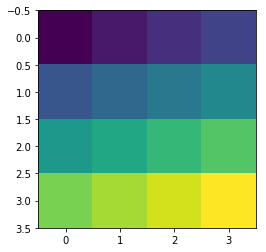

In [129]:
plt.imshow(x)

In [127]:
x = x / 16

In [128]:
x

array([[-0.25  , -0.1875, -0.125 , -0.0625],
       [ 0.    ,  0.0625,  0.125 ,  0.1875],
       [ 0.25  ,  0.3125,  0.375 ,  0.4375],
       [ 0.5   ,  0.5625,  0.625 ,  0.6875]])

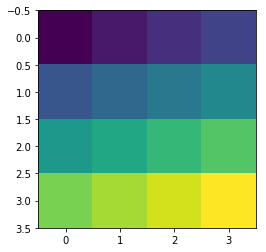

In [130]:
plt.imshow(x)

In [139]:
y = np.expand_dims(x.ravel(), -1).T

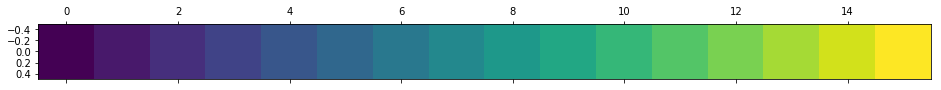

In [140]:
plt.matshow(y)

In [141]:
plt.gray()

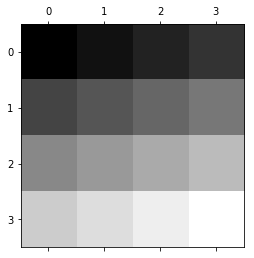

In [142]:
plt.matshow(x)

* **切片 slice 构造**

In [146]:
np.index_exp[2::2]

(slice(2, None, 2),)

In [147]:
np.s_[2::2]

slice(2, None, 2)

In [148]:
slice(2, None, 2)

slice(2, None, 2)

In [149]:
x = np.arange(6)

In [150]:
x

array([0, 1, 2, 3, 4, 5])

In [151]:
np.delete(x, np.s_[2::2])

array([0, 1, 3, 5])

In [152]:
x

array([0, 1, 2, 3, 4, 5])

* slice define
```python
class slice(stop)
class slice(start, stop[, step])
```

In [155]:
np.delete(x, slice(2,None,2))

array([0, 1, 3, 5])

### 数组旋转

In [158]:
yt = np.arange(16).reshape(-1, 4)
yt

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [161]:
# 旋转一次
np.rot90(yt)

array([[ 3,  7, 11, 15],
       [ 2,  6, 10, 14],
       [ 1,  5,  9, 13],
       [ 0,  4,  8, 12]])

In [162]:
np.rot90(yt, k=2)

array([[15, 14, 13, 12],
       [11, 10,  9,  8],
       [ 7,  6,  5,  4],
       [ 3,  2,  1,  0]])

In [164]:
np.rot90(yt, axes=(1, 0))

array([[12,  8,  4,  0],
       [13,  9,  5,  1],
       [14, 10,  6,  2],
       [15, 11,  7,  3]])